In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.6)

In [47]:
df=pd.read_csv('collage_data.csv')
df.head(10)

private  apps  accept  enroll  top10perc  top25perc  f_undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   
5     Yes   587     479     158         38         62          678   
6     Yes   353     340     103         17         45          416   
7     Yes  1899    1720     489         37         68         1594   
8     Yes  1038     839     227         30         63          973   
9     Yes   582     498     172         21         44          799   

   p_undergrad  outstate  room_board  books  personal  phd  terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   
5           41     13500        3335    500       675   67        73   
6          230     13290        5720    500      1500   90        93   
7           32     13868        4826    450       850   89       100   
8          306     15595        4400    300       500   79        84   
9           78     10468        3380    660      1800   40        41   

   s_f_ratio  perc_alumni  expend  grad_rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15  
5        9.4           11    9727         55  
6       11.5           26    8861         63  
7       13.7           37   11487         73  
8       11.3           23   11644         80  
9       11.5           15    8991         52

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
private        777 non-null object
apps           777 non-null int64
accept         777 non-null int64
enroll         777 non-null int64
top10perc      777 non-null int64
top25perc      777 non-null int64
f_undergrad    777 non-null int64
p_undergrad    777 non-null int64
outstate       777 non-null int64
room_board     777 non-null int64
books          777 non-null int64
personal       777 non-null int64
phd            777 non-null int64
terminal       777 non-null int64
s_f_ratio      777 non-null float64
perc_alumni    777 non-null int64
expend         777 non-null int64
grad_rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [49]:
df.describe()

apps        accept       enroll   top10perc   top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        f_undergrad   p_undergrad      outstate   room_board        books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          personal         phd    terminal   s_f_ratio  perc_alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             expend  grad_rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

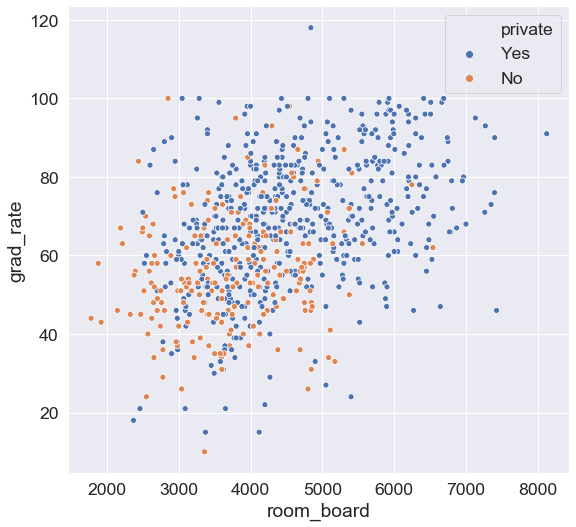

In [50]:
sns.scatterplot('room_board', 'grad_rate', data=df, hue='private')

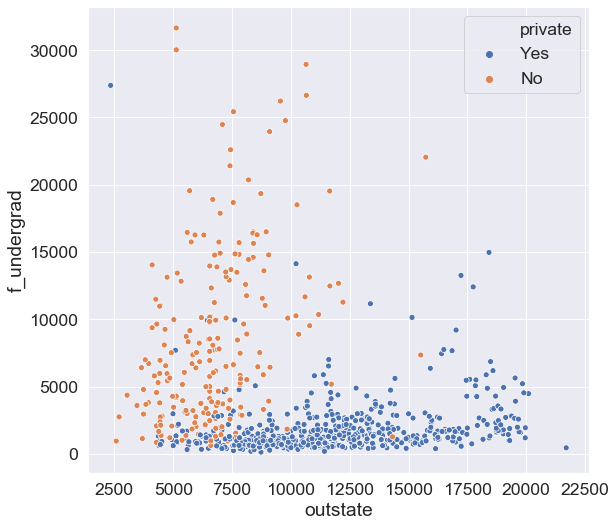

In [51]:
sns.scatterplot('outstate', 'f_undergrad', data=df, hue='private')

In [52]:
kmeans = KMeans(2)

In [53]:
kmeans.fit(df.drop('private', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.cluster_centers_


array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [55]:
df['private'] = df.private.astype("category").cat.codes
df.head()

private  apps  accept  enroll  top10perc  top25perc  f_undergrad  \
0        1  1660    1232     721         23         52         2885   
1        1  2186    1924     512         16         29         2683   
2        1  1428    1097     336         22         50         1036   
3        1   417     349     137         60         89          510   
4        1   193     146      55         16         44          249   

   p_undergrad  outstate  room_board  books  personal  phd  terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   s_f_ratio  perc_alumni  expend  grad_rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

In [56]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(df.private, kmeans.labels_))
print(classification_report(df.private, kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [58]:
df.columns

Index(['private', 'apps', 'accept', 'enroll', 'top10perc', 'top25perc',
       'f_undergrad', 'p_undergrad', 'outstate', 'room_board', 'books',
       'personal', 'phd', 'terminal', 's_f_ratio', 'perc_alumni', 'expend',
       'grad_rate'],
      dtype='object')

In [67]:
df1=df.copy(deep=True)



In [68]:
df1.drop('private',axis=1,inplace=True)
df1.head()

apps  accept  enroll  top10perc  top25perc  f_undergrad  p_undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   outstate  room_board  books  personal  phd  terminal  s_f_ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc_alumni  expend  grad_rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [69]:

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
scaled_df1 = ms.fit_transform(df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns=['apps', 'accept', 'enroll', 'top10perc', 'top25perc',
       'f_undergrad', 'p_undergrad', 'outstate', 'room_board', 'books',
       'personal', 'phd', 'terminal', 's_f_ratio', 'perc_alumni', 'expend',
       'grad_rate'])

In [72]:
scaled_df1.head()

apps    accept    enroll  top10perc  top25perc  f_undergrad  \
0  0.032887  0.044177  0.107913   0.231579   0.472527     0.087164   
1  0.043842  0.070531  0.075035   0.157895   0.219780     0.080752   
2  0.028055  0.039036  0.047349   0.221053   0.450549     0.028473   
3  0.006998  0.010549  0.016045   0.621053   0.879121     0.011776   
4  0.002333  0.002818  0.003146   0.157895   0.384615     0.003492   

   p_undergrad  outstate  room_board     books  personal       phd  terminal  \
0     0.024548  0.263430    0.239596  0.157754  0.297710  0.652632  0.710526   
1     0.056148  0.513430    0.736129  0.291444  0.190840  0.221053  0.078947   
2     0.004488  0.460227    0.310530  0.135472  0.139695  0.473684  0.552632   
3     0.002839  0.548554    0.578499  0.157754  0.095420  0.884211  0.960526   
4     0.039753  0.269628    0.368852  0.313725  0.190840  0.715789  0.631579   

   s_f_ratio  perc_alumni    expend  grad_rate  
0   0.418231     0.187500  0.072671   0.462963  
1   0.260054     0.250000  0.138387   0.425926  
2   0.278820     0.468750  0.104605   0.407407  
3   0.139410     0.578125  0.298415   0.453704  
4   0.252011     0.031250  0.145833   0.046296

C:\Users\Meagzzz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Meagzzz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


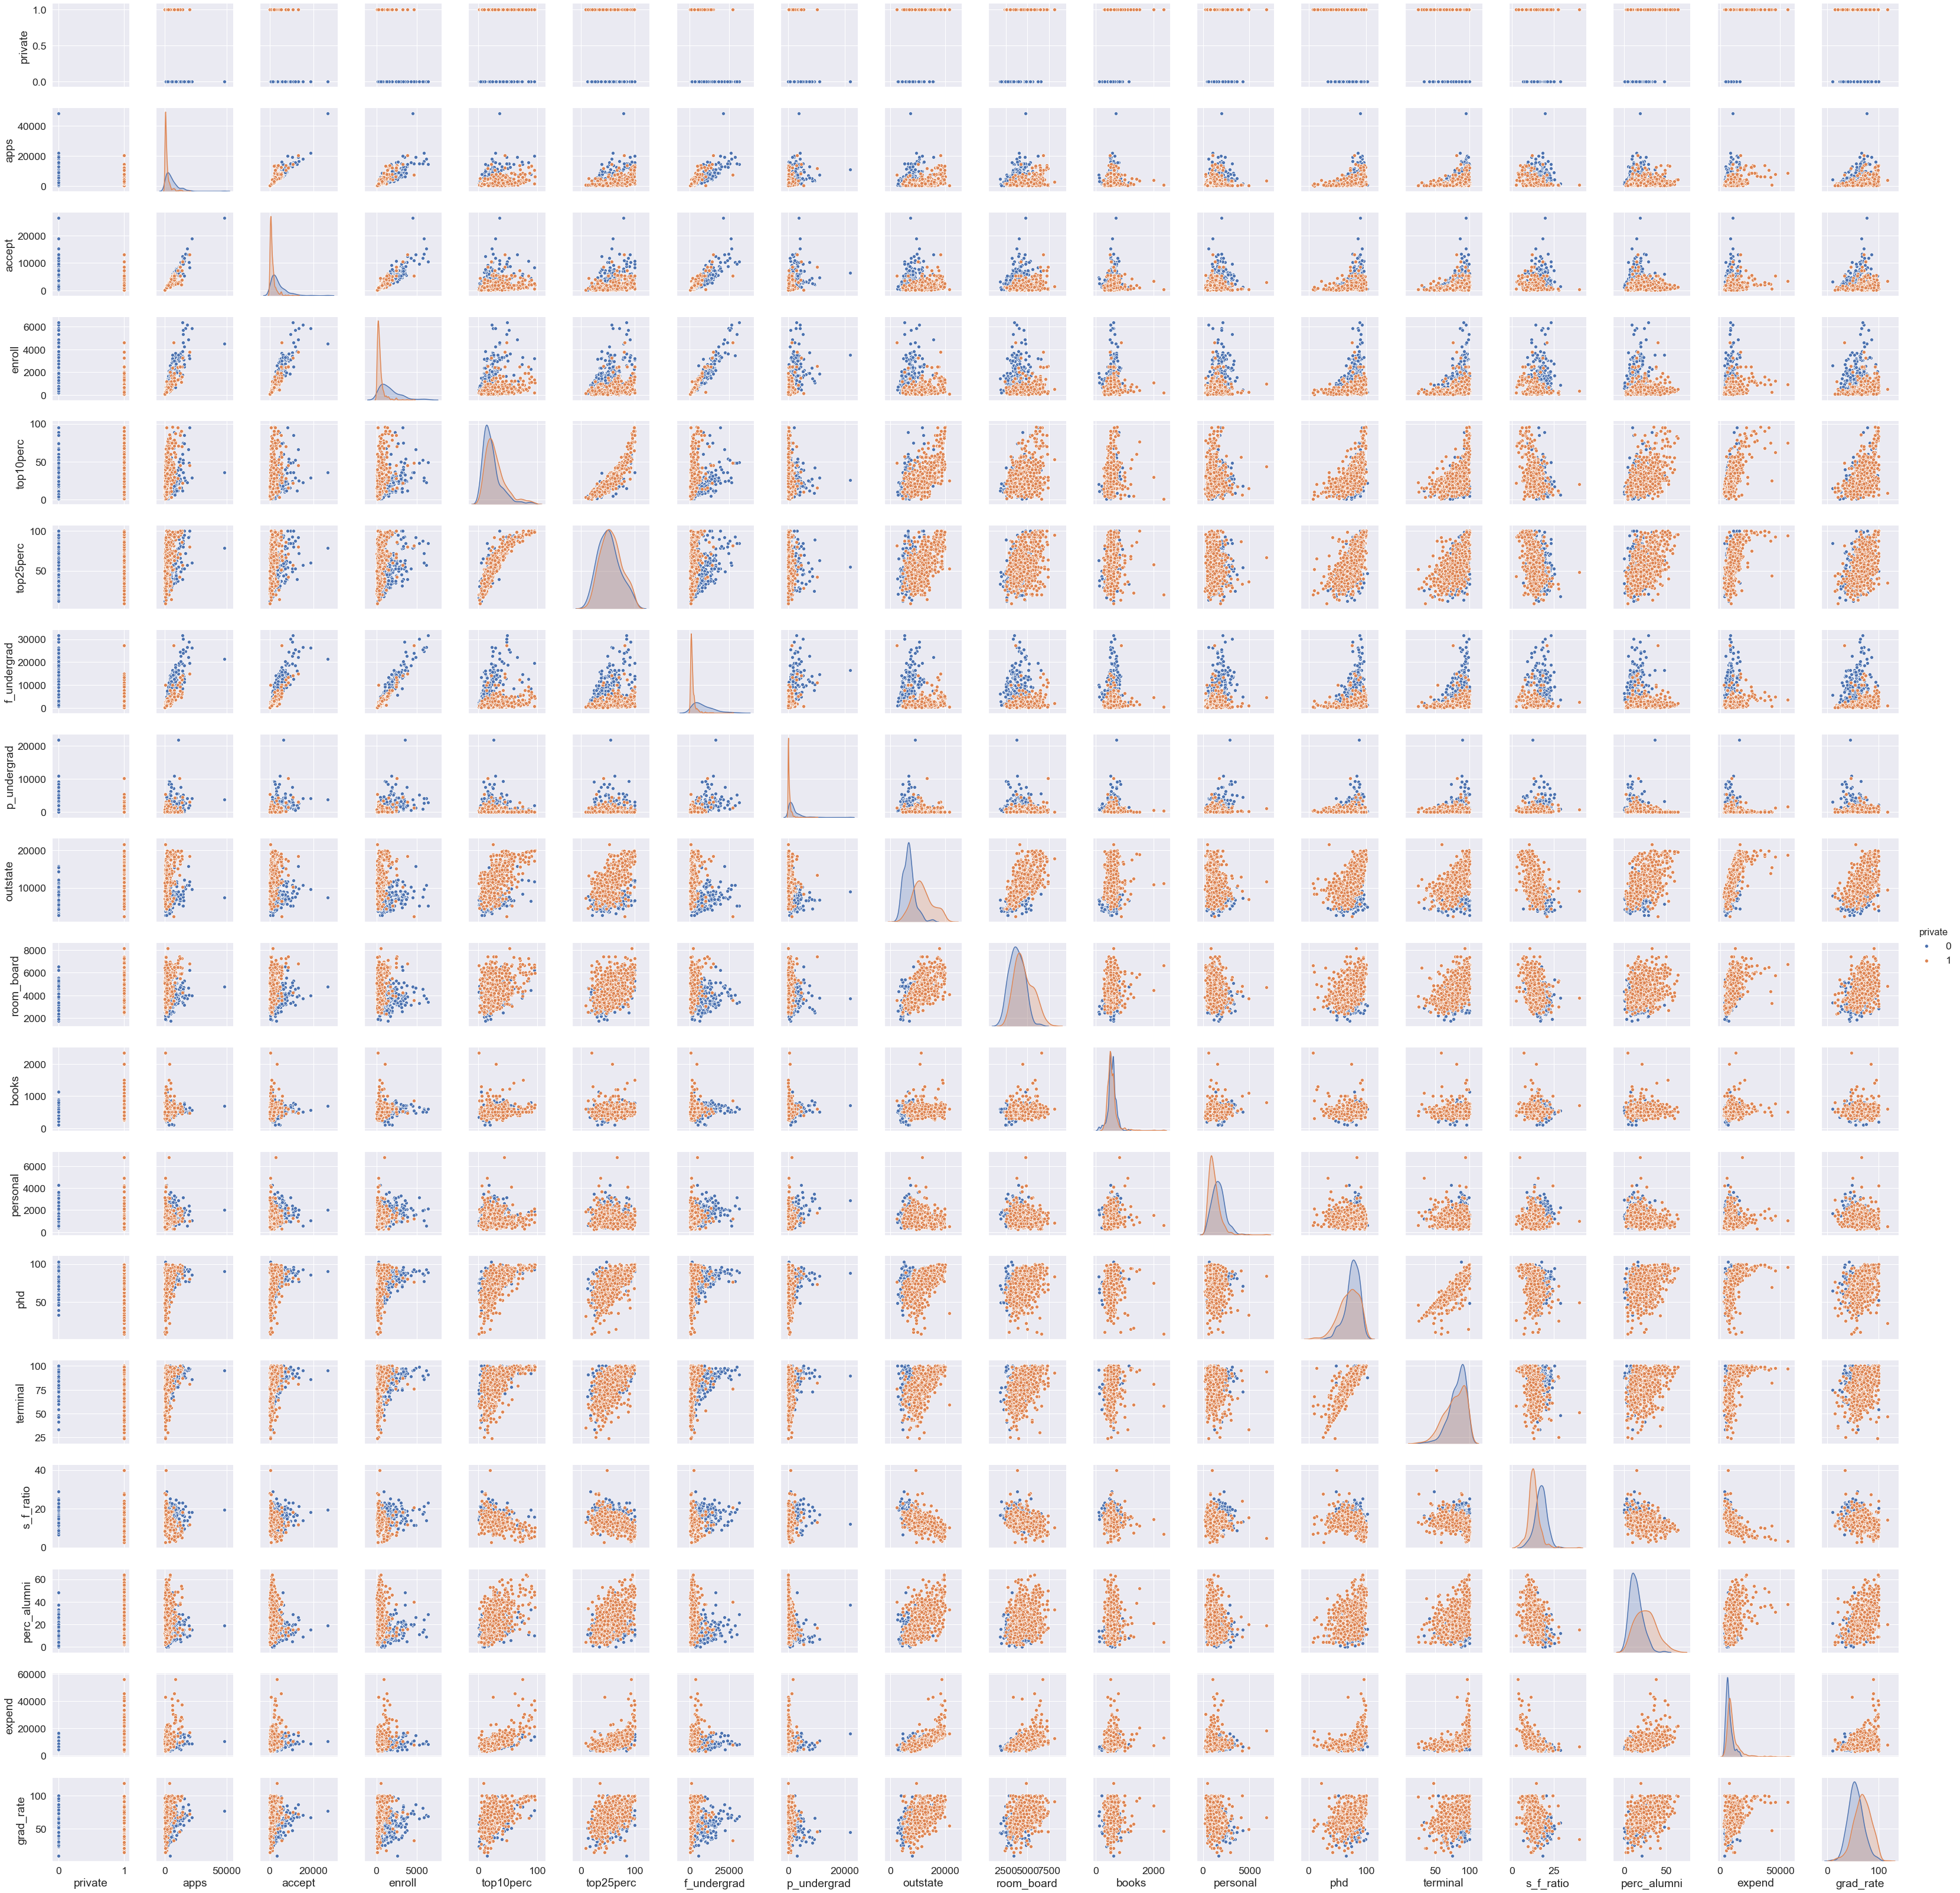

In [78]:
sns.pairplot(df,hue='private')

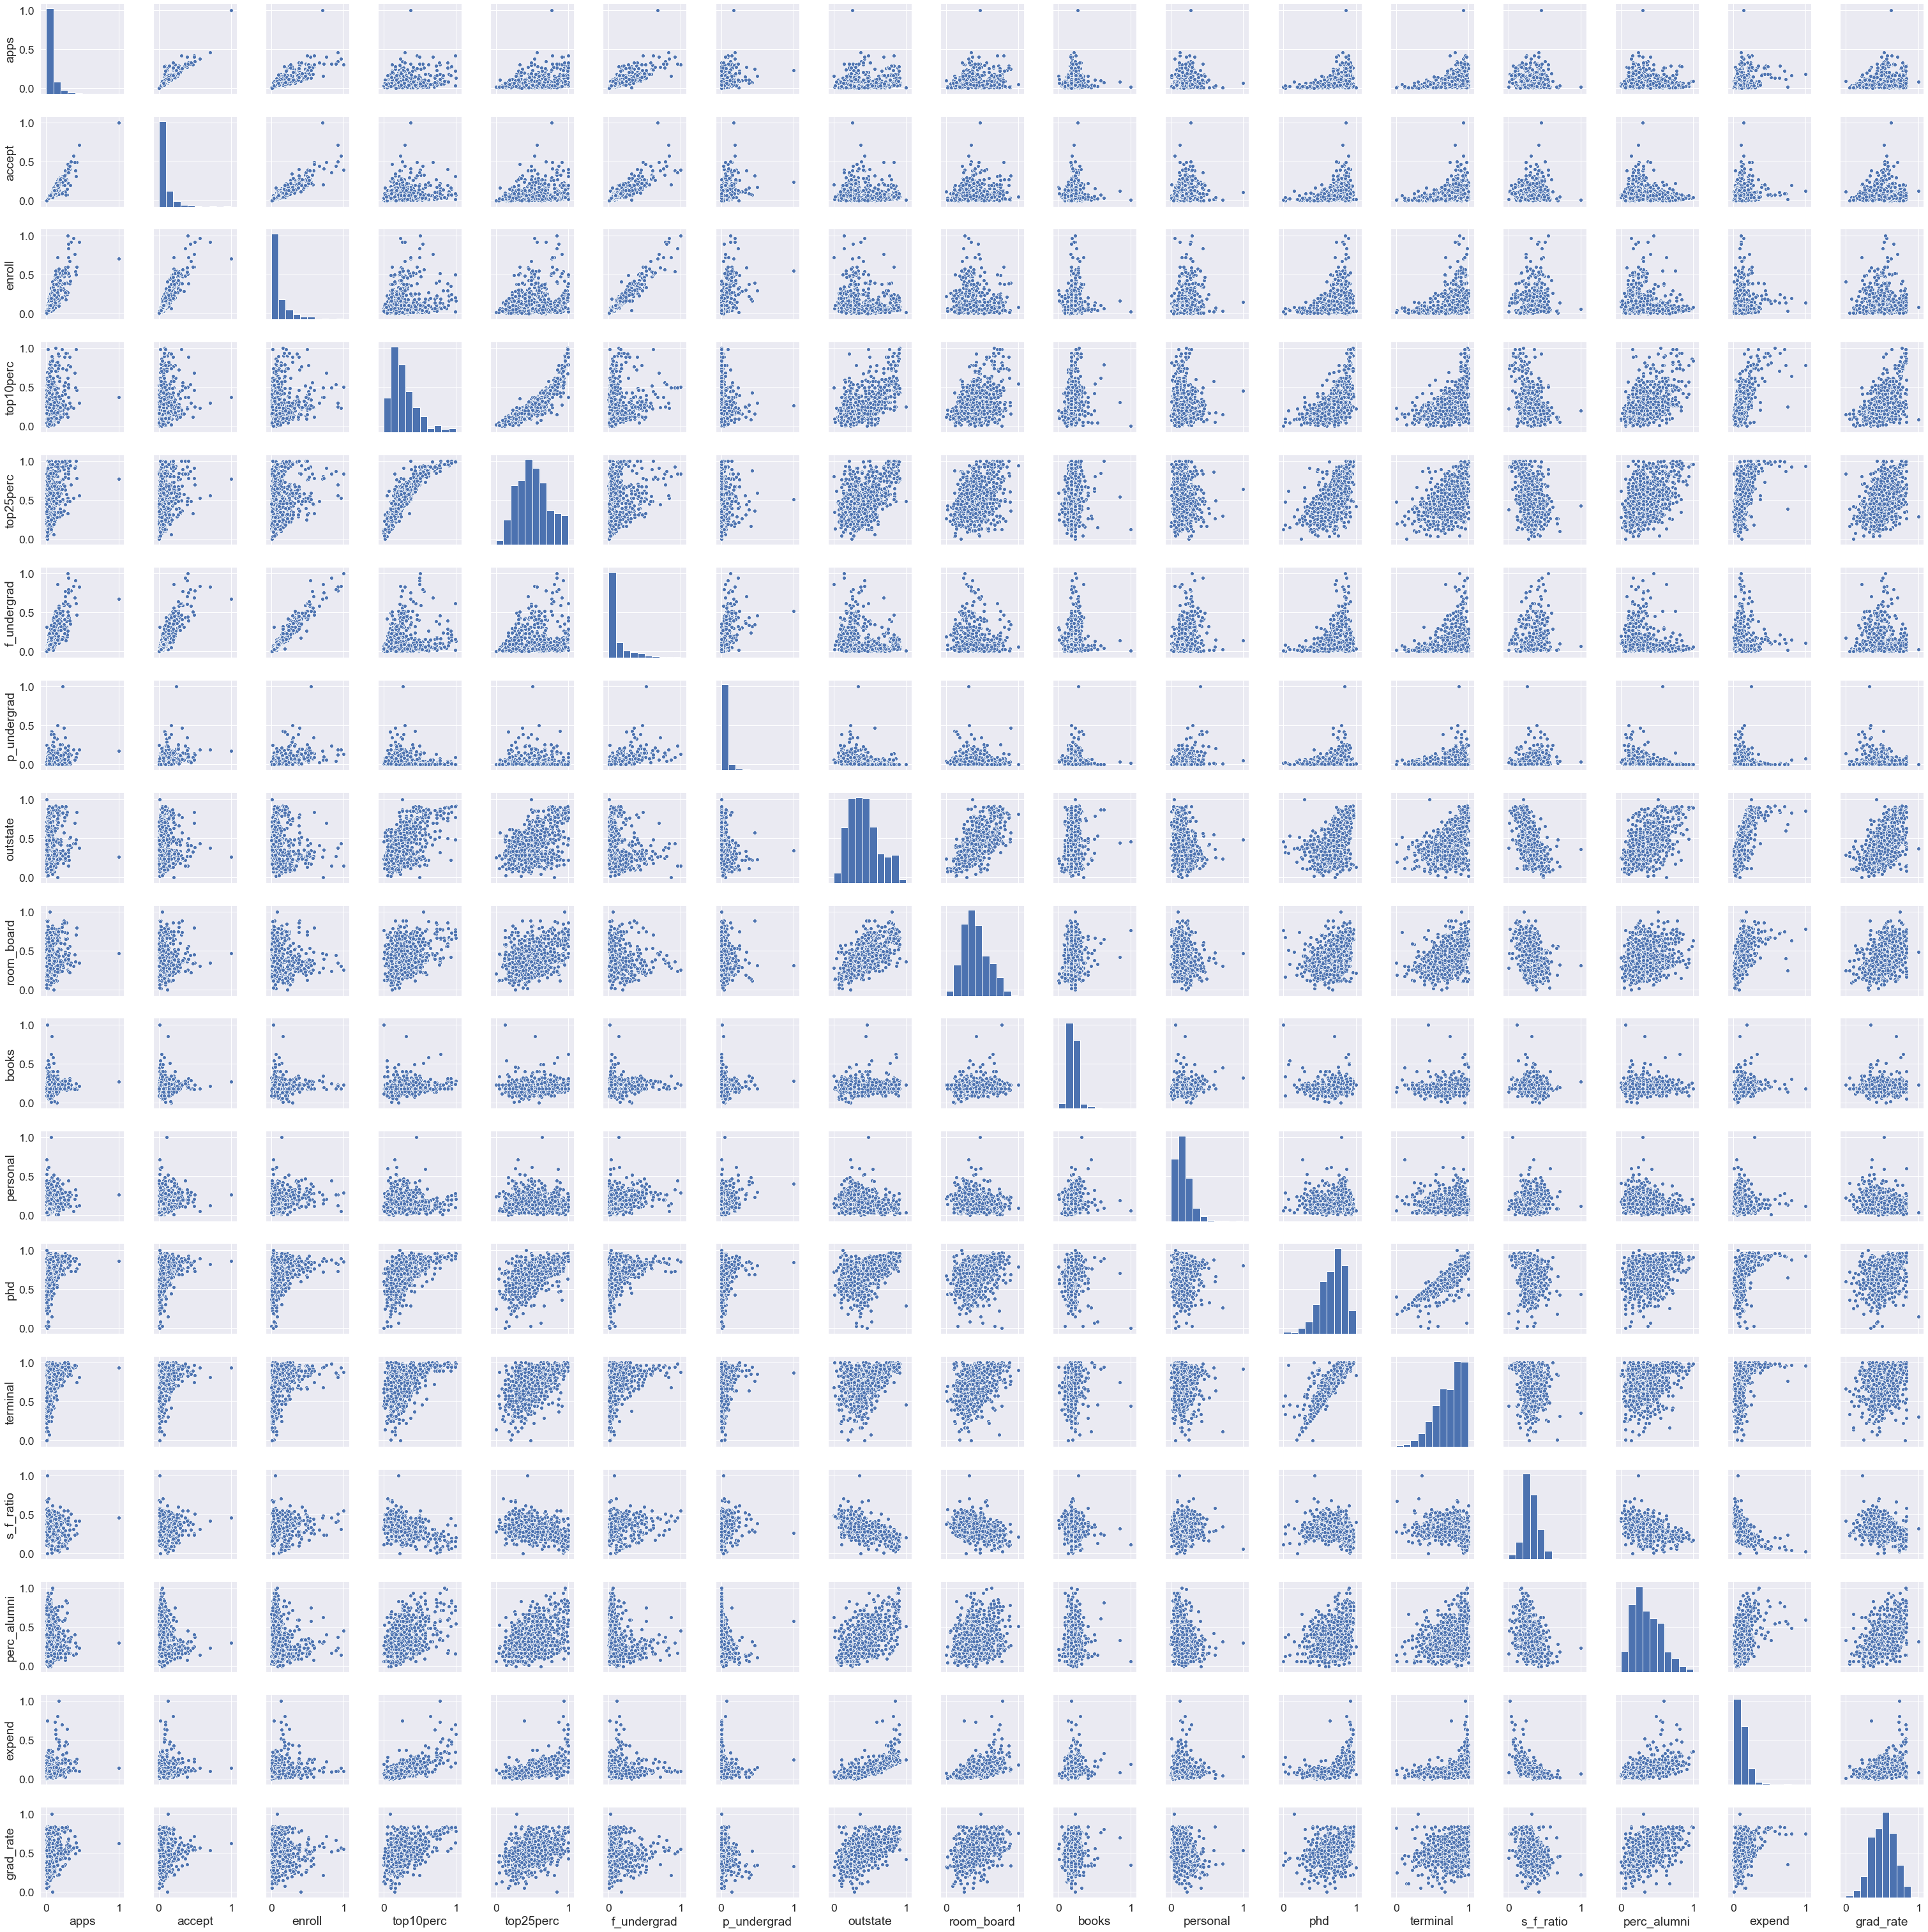

In [76]:
sns.pairplot(scaled_df1)